In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # pretty matplotlib plots
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics

In [3]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [6]:
slugpct.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [7]:
slugpct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [4]:
slugpct.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,109739.000000,108127.000000,86954.000000,110495.000000,108395.000000,73845.000000,107679.000000,104427.000000,74392.00000,85054.000000
mean,1968.051948,1.079624,50.605258,138.557084,18.397312,36.184117,6.177429,1.233893,2.859939,16.720664,2.893190,1.162431,12.787556,20.625038,1.040368,1.060810,2.168529,1.01480,2.874586
std,39.992877,0.288199,46.831714,183.317500,27.990668,52.066687,9.613576,2.580559,6.386896,26.187532,7.564655,2.662906,20.555314,28.724308,2.688349,2.299942,4.129955,1.92328,4.658673
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1938.000000,1.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1977.000000,1.000000,34.000000,45.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2002.000000,1.000000,78.000000,222.000000,26.000000,55.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.00000,4.000000
max,2021.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.00000,36.000000


In [8]:
slugpct.shape

(110495, 22)

In [5]:
slugpct.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110494,zuninmi01,2021,1,TBA,AL,109,333,64,72,11,...,62.0,0.0,0.0,34,132.0,0.0,7.0,0.0,1.0,7.0


In [9]:
slugpct.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,1.000000,0.008484,-0.004129,-0.111691,-0.117776,-0.109087,-0.033436,-0.271024,0.139208,-0.076870,-0.178596,-0.133689,-0.046381,0.117066,-0.082355,-0.046373,-0.332471,-0.038044,-0.041065
stint,0.008484,1.000000,-0.124525,-0.099032,-0.093063,-0.094596,-0.090734,-0.065868,-0.066901,-0.087873,-0.056485,-0.064785,-0.085250,-0.089664,-0.070038,-0.062108,-0.066283,-0.079209,-0.082941
G,-0.004129,-0.124525,1.000000,0.942596,0.886871,0.924404,0.875768,0.646179,0.672984,0.869615,0.549967,0.634577,0.842087,0.794577,0.607394,0.598804,0.474215,0.755403,0.819656
AB,-0.111691,-0.099032,0.942596,1.000000,0.953444,0.987703,0.932339,0.711248,0.702428,0.924947,0.608063,0.682980,0.872595,0.815549,0.638612,0.634477,0.500390,0.808582,0.872576
R,-0.117776,-0.093063,0.886871,0.953444,1.000000,0.967960,0.921795,0.740833,0.736156,0.929246,0.663439,0.683630,0.894141,0.766194,0.646652,0.645101,0.449395,0.789288,0.814005
H,-0.109087,-0.094596,0.924404,0.987703,0.967960,1.000000,0.947331,0.735261,0.708201,0.938811,0.617111,0.688235,0.868961,0.772981,0.652856,0.628660,0.484401,0.808974,0.865176
2B,-0.033436,-0.090734,0.875768,0.932339,0.921795,0.947331,1.000000,0.652081,0.730861,0.919551,0.529294,0.615979,0.837343,0.776771,0.630240,0.610322,0.393351,0.790683,0.831813
3B,-0.271024,-0.065868,0.646179,0.711248,0.740833,0.735261,0.652081,1.000000,0.344628,0.662131,0.627904,0.659420,0.593775,0.438288,0.414015,0.442216,0.531730,0.535716,0.548237
HR,0.139208,-0.066901,0.672984,0.702428,0.736156,0.708201,0.730861,0.344628,1.000000,0.839372,0.265947,0.373582,0.735221,0.797175,0.657365,0.506708,0.056882,0.701150,0.701180
RBI,-0.076870,-0.087873,0.869615,0.924947,0.929246,0.938811,0.919551,0.662131,0.839372,1.000000,0.507547,0.560749,0.860269,0.787626,0.694612,0.614042,0.365267,0.831560,0.843295


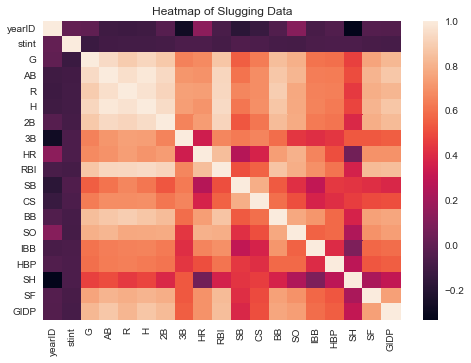

In [13]:
sns.heatmap(slugpct.corr())
plt.title("Heatmap of Slugging Data")
plt.show()

In [17]:
slugpct["HR"]

0          0
1          0
2          0
3          2
4          0
          ..
110490     0
110491     0
110492    14
110493     0
110494    33
Name: HR, Length: 110495, dtype: int64

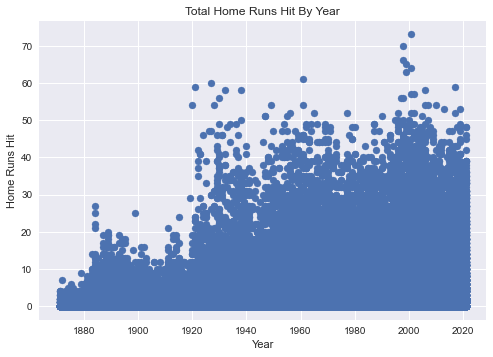

In [23]:
plt.scatter(slugpct["yearID"], slugpct["HR"])
plt.title("Total Home Runs Hit By Year")
plt.xlabel("Year")
plt.ylabel("Home Runs Hit")
plt.show()

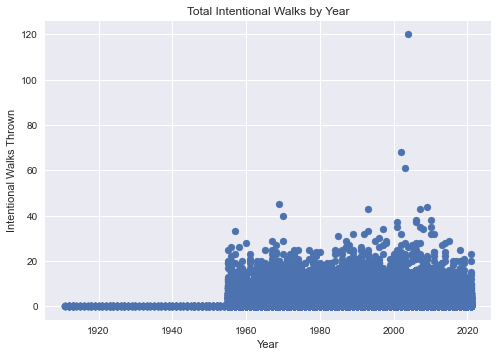

In [25]:
plt.scatter(slugpct["yearID"], slugpct["IBB"])
plt.title("Total Intentional Walks by Year")
plt.xlabel("Year")
plt.ylabel("Intentional Walks Thrown")
plt.show()

/Users/mattjchin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


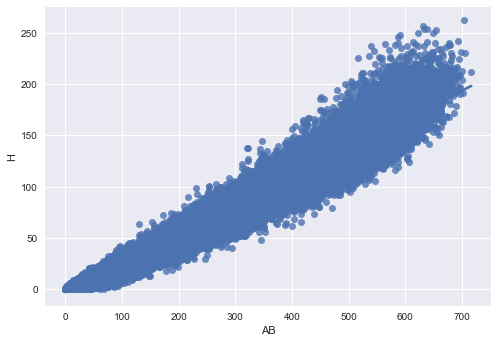

In [27]:
# Regression Plot
sns.regplot(slugpct["AB"], slugpct["H"])
plt.show()

In [29]:
 slugpct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [34]:
# Find connections on multiple regression between hits and everything else
x = slugpct.drop(["H"], axis=1)
y = slugpct["H"]